In [1]:
# Start writing code here...
# !pip install openpyxl


In [2]:
import pandas as pd


file_name = "Hackathon_Nobian_dataset.xlsx"

df = pd.read_excel(file_name)

In [15]:
df.head()

,valve (A) timestamp,valve (A) output value,flow setpoint (B) timestamp,flow setpoint (B) value,flow measurment (C) timestamp,flow measurment (C) value
0,2017-06-07 00:12:00,33.901329,2020-12-08 11:02:00,34.110046,2017-06-07 00:32:00,32.778099
1,2017-06-07 00:15:00,34.122898,2020-12-08 11:03:00,34.098965,2017-06-07 00:33:00,32.574242
2,2017-06-07 00:17:01,33.354141,2020-12-08 11:04:00,34.082336,2017-06-07 00:34:00,33.218788
3,2017-06-07 00:32:00,34.0994,2020-12-08 11:05:00,34.101734,2017-06-07 00:57:00,33.102821
4,2017-06-07 00:34:00,34.3881,2020-12-08 11:06:00,34.098965,2017-06-07 01:14:00,33.162628


In [26]:
t_a = [t for t in df["valve (A) timestamp"] if t is not pd.NaT]
t_b = [t for t in df["flow setpoint (B) timestamp"] if t is not pd.NaT]
t_c = [t for t in df["flow measurment (C) timestamp"] if t is not pd.NaT]

In [27]:
t_s = max(t_a[0], t_b[0], t_c[0])
print(t_s)
t_e = min(t_a[-1], t_b[-1], t_c[-1])
print(t_e)

2020-12-08 11:02:00
2022-03-23 00:00:00


<AxesSubplot:>

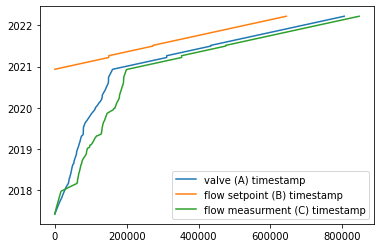

In [28]:


df.plot()

In [29]:
A_start_idx = df.index[df["valve (A) timestamp"] == t_s].tolist()[0]
B_start_idx = df.index[df["flow setpoint (B) timestamp"] == t_s].tolist()[0]
C_start_idx = df.index[df["flow measurment (C) timestamp"] == t_s].tolist()[0]

print(A_start_idx)
print(B_start_idx)
print(C_start_idx)

A_end_idx = df.index[df["valve (A) timestamp"] == t_e].tolist()[0]
B_end_idx = df.index[df["flow setpoint (B) timestamp"] == t_e].tolist()[0]
C_end_idx = df.index[df["flow measurment (C) timestamp"] == t_e].tolist()[0]

print(A_end_idx)
print(B_end_idx)
print(C_end_idx)

161157
0
202547
805440
644258
846848


In [30]:
crop_A = df["valve (A) output value"][A_start_idx:A_end_idx]
crop_B = df["flow setpoint (B) value"][B_start_idx:B_end_idx]
crop_C = df["flow measurment (C) value"][C_start_idx:C_end_idx]
print(len(crop_A), len(crop_B))
print(len(crop_B), len(crop_C))
crop_A_t = df["valve (A) timestamp"][A_start_idx:A_end_idx]
crop_B_t = df["flow setpoint (B) timestamp"][B_start_idx:B_end_idx]
crop_C_t = df["flow measurment (C) timestamp"][C_start_idx:C_end_idx]



644283 644258
644258 644301


In [37]:
pd.DataFrame([t_a, crop_A], index=["t_a", "crop_A"])

,0,1,2,3,4,5,6,7,8,9,...,805431,805432,805433,805434,805435,805436,805437,805438,805439,805440
t_a,2017-06-07 00:12:00,2017-06-07 00:15:00,2017-06-07 00:17:01,2017-06-07 00:32:00,2017-06-07 00:34:00,2017-06-07 00:37:00,2017-06-07 00:52:00,2017-06-07 01:02:00,2017-06-07 01:11:00,2017-06-07 01:13:00,...,2022-03-22 23:51:00,2022-03-22 23:52:00,2022-03-22 23:53:00,2022-03-22 23:54:00,2022-03-22 23:55:00,2022-03-22 23:56:00,2022-03-22 23:57:00,2022-03-22 23:58:00,2022-03-22 23:59:00,2022-03-23
crop_A,41.358326,41.336464,41.15049,41.724281,41.843632,41.94474,41.470345,41.121578,41.359692,41.170689,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [31]:
i = 0
while i < len(crop_A_t) and i < len(crop_B_t) and i < len(crop_C_t):
    t = max(crop_A_t[i], crop_B_t[i], crop_C_t[i])
    step = True
    if crop_A_t[i] < t:
        crop_A_t.pop(i)
        crop_A.pop(i)
        step = False
    if crop_B_t[i] < t:
        crop_B_t.pop(i)
        crop_B.pop(i)
        step = False
    if crop_C_t[i] < t:
        crop_C_t.pop(i)
        crop_C.pop(i)
        step = False
    if step:
        i += 1
    print(i)



KeyError: 0

In [ ]:
assert len(crop_A) == len(crop_B)
assert len(crop_A) == len(crop_C)

In [ ]:
pd.DataFrame([t_a, crop_A])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=58dc0391-5e72-435e-889e-3e6e11073ba7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>